<a href="https://colab.research.google.com/github/Illoizaur/Team1_Andrusiak-Dunets/blob/main/ML_Andrusiak_Dunets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Крок 1: Ознайомлення з даними

Підключаєм диск та імпортуєм певні бібліотеки

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Завантажуєм тестовий та тренувальні набори

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

Ознайомлюємось із структурою

In [ ]:
print("Перші 5 рядків навчального набору даних:")
print(train_df.head())
print("\nПерші 5 рядків тестового набору даних:")
print(test_df.head())

Перші 5 рядків навчального набору даних:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  

Перші 5 рядків тестового набору даних:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN 

Глянем на розмірність...

In [ ]:
print(f"Розмір навчального набору даних: {train_df.shape}")
print(f"Розмір тестового набору даних: {test_df.shape}")

Розмір навчального набору даних: (7613, 5)
Розмір тестового набору даних: (3263, 4)


Проаналізуємо розподіл цільової змінної target у навчальному наборі даних, щоб оцінити збалансованість класів


Розподіл цільової змінної:
target
0    4342
1    3271
Name: count, dtype: int64


<ipython-input-30-d9cdfc22c29e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values, palette=['green', 'red'])


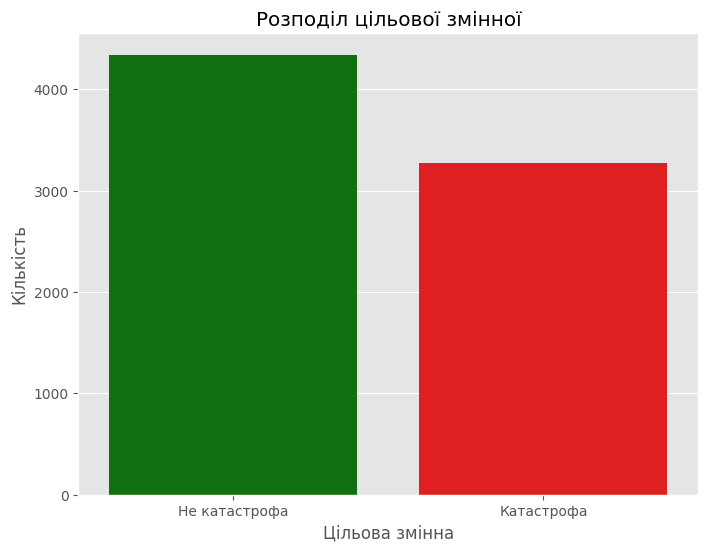

In [ ]:
target_counts = train_df['target'].value_counts()
print("\nРозподіл цільової змінної:")
print(target_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values, palette=['green', 'red'])
plt.xticks([0, 1], ['Не катастрофа', 'Катастрофа'])
plt.title('Розподіл цільової змінної')
plt.xlabel('Цільова змінна')
plt.ylabel('Кількість')
plt.show()

Проаналізуємо довжину твітів за кількістю символів та слів для обох класів цільової змінної

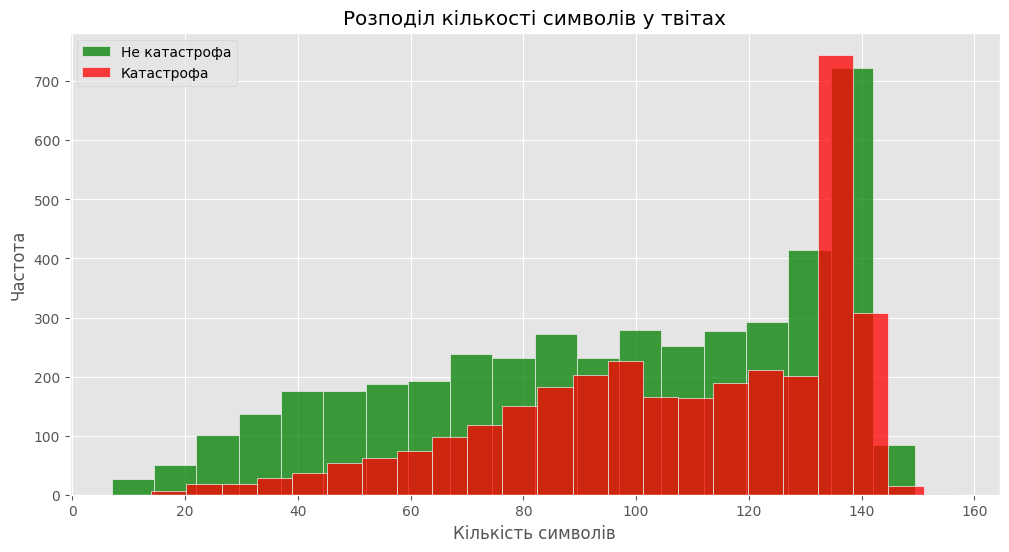

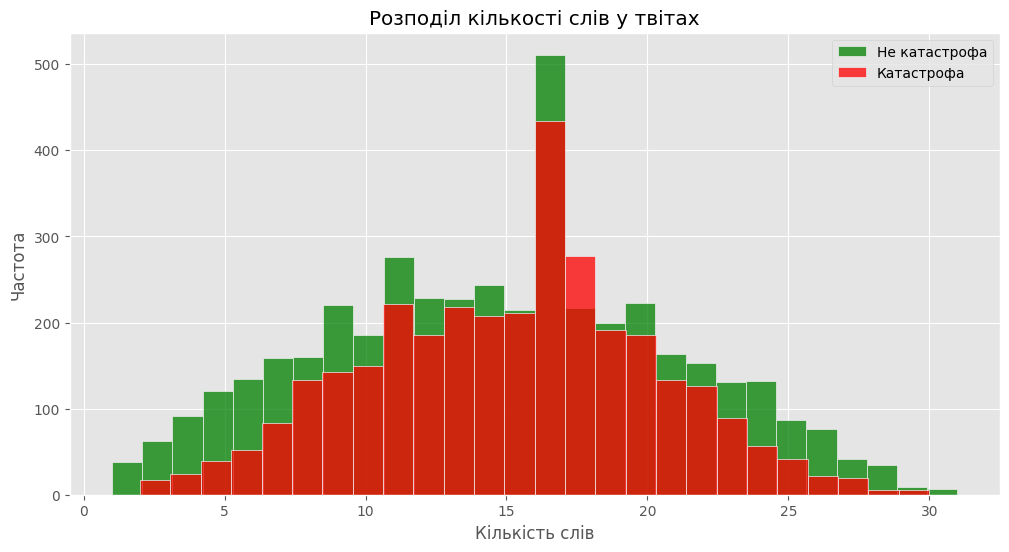


Середня кількість слів у твітах про катастрофи: 15.167532864567411
Середня кількість слів у твітах, що не стосуються катастроф: 14.704744357438969


In [ ]:
train_df['char_count'] = train_df['text'].apply(len)

train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(train_df[train_df['target'] == 0]['char_count'], label='Не катастрофа', color='green')
sns.histplot(train_df[train_df['target'] == 1]['char_count'], label='Катастрофа', color='red')
plt.title('Розподіл кількості символів у твітах')
plt.xlabel('Кількість символів')
plt.ylabel('Частота')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(train_df[train_df['target'] == 0]['word_count'], label='Не катастрофа', color='green')
sns.histplot(train_df[train_df['target'] == 1]['word_count'], label='Катастрофа', color='red')
plt.title('Розподіл кількості слів у твітах')
plt.xlabel('Кількість слів')
plt.ylabel('Частота')
plt.legend()
plt.show()

print("\nСередня кількість слів у твітах про катастрофи:", train_df[train_df['target'] == 1]['word_count'].mean())
print("Середня кількість слів у твітах, що не стосуються катастроф:", train_df[train_df['target'] == 0]['word_count'].mean())

Для аналізу словникового запасу нам знадобиться обробити текст, наприклад, видалити стоп-слова. Однак на цьому етапі нам слід отримати загальне уявлення про найчастіше вживані слова.

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def count_common_words(df, column, n=20):
    words = Counter()
    for text in df[column]:
        if isinstance(text, str):
            for word in text.lower().split():
                if word not in stop_words:
                    words[word] += 1
    return words.most_common(n)

common_words_disaster = count_common_words(train_df[train_df['target'] == 1], 'text')
print("\nНайчастіші слова у твітах про катастрофи:")
print(common_words_disaster)

common_words_not_disaster = count_common_words(train_df[train_df['target'] == 0], 'text')
print("\nНайчастіші слова у твітах, що не стосуються катастроф:")
print(common_words_not_disaster)


Найчастіші слова у твітах про катастрофи:
[('-', 389), ('fire', 151), ('via', 117), ('...', 106), ('&amp;', 105), ('suicide', 103), ('disaster', 97), ('police', 94), ('people', 93), ('killed', 92), ('like', 91), ('california', 88), ('families', 81), ('two', 71), ('storm', 71), ('train', 71), ('2', 67), ('bomb', 67), ('emergency', 66), ('get', 66)]

Найчастіші слова у твітах, що не стосуються катастроф:
[('-', 374), ('like', 250), ('&amp;', 190), ('??', 183), ('new', 163), ('get', 161), ('one', 116), ('body', 106), ('via', 97), ('would', 94), ('|', 91), ('love', 85), ('got', 82), ('people', 81), ('full', 81), ('see', 79), ('know', 78), ('2', 78), ('video', 76), ('back', 75)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Проаналізуємо наявність URL-адрес, згадок (@) та хештегів (#) у твітах:

In [ ]:
def count_special_elements(df, column):
    urls = df[column].str.findall(r'(https?://\S+|www\.\S+)')
    mentions = df[column].str.findall(r'@\w+')
    hashtags = df[column].str.findall(r'#\w+')

    return urls.apply(len).sum(), mentions.apply(len).sum(), hashtags.apply(len).sum()

urls_disaster, mentions_disaster, hashtags_disaster = count_special_elements(train_df[train_df['target'] == 1], 'text')
print(f"\nКількість URL-адрес у твітах про катастрофи: {urls_disaster}")
print(f"Кількість згадок (@) у твітах про катастрофи: {mentions_disaster}")
print(f"Кількість хештегів (#) у твітах про катастрофи: {hashtags_disaster}")

urls_not_disaster, mentions_not_disaster, hashtags_not_disaster = count_special_elements(train_df[train_df['target'] == 0], 'text')
print(f"\nКількість URL-адрес у твітах, що не стосуються катастроф: {urls_not_disaster}")
print(f"Кількість згадок (@) у твітах, що не стосуються катастроф: {mentions_not_disaster}")
print(f"Кількість хештегів (#) у твітах, що не стосуються катастроф: {hashtags_not_disaster}")


Кількість URL-адрес у твітах про катастрофи: 2519
Кількість згадок (@) у твітах про катастрофи: 890
Кількість хештегів (#) у твітах про катастрофи: 1642

Кількість URL-адрес у твітах, що не стосуються катастроф: 2204
Кількість згадок (@) у твітах, що не стосуються катастроф: 1825
Кількість хештегів (#) у твітах, що не стосуються катастроф: 1688


Проаналізуємо стовпець keyword:

In [ ]:
print("\nКількість унікальних ключових слів у навчальному наборі даних:", train_df['keyword'].nunique())

keyword_counts = train_df['keyword'].value_counts().nlargest(20)
print("\nТоп-20 найчастіших ключових слів:")
print(keyword_counts)

print("\nКількість пропущених значень у стовпці 'keyword':", train_df['keyword'].isnull().sum())


Кількість унікальних ключових слів у навчальному наборі даних: 221

Топ-20 найчастіших ключових слів:
keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
siren          40
windstorm      40
collided       40
twister        40
hellfire       39
famine         39
flames         39
weapon         39
wreckage       39
sunk           39
Name: count, dtype: int64

Кількість пропущених значень у стовпці 'keyword': 61


Проаналізуємо стовпець location:

In [ ]:
print("\nКількість унікальних місцезнаходжень у навчальному наборі даних:", train_df['location'].nunique())

print("Кількість пропущених значень у стовпці 'location':", train_df['location'].isnull().sum())

location_counts = train_df['location'].value_counts().nlargest(20)
print("\nТоп-20 найчастіших місцезнаходжень:")
print(location_counts)


Кількість унікальних місцезнаходжень у навчальному наборі даних: 3341
Кількість пропущених значень у стовпці 'location': 2533

Топ-20 найчастіших місцезнаходжень:
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
New York, NY        15
California, USA     15
Everywhere          15
San Francisco       14
Name: count, dtype: int64


Перевіримо кількість пропущених значень у всіх стовпцях навчального набору даних:

In [ ]:
print("\nКількість пропущених значень у кожному стовпці навчального набору даних:")
print(train_df.isnull().sum())

print("\nКількість пропущених значень у кожному стовпці тестового набору даних:")
print(test_df.isnull().sum())


Кількість пропущених значень у кожному стовпці навчального набору даних:
id               0
keyword         61
location      2533
text             0
target           0
char_count       0
word_count       0
dtype: int64

Кількість пропущених значень у кожному стовпці тестового набору даних:
id             0
keyword       26
location    1105
text           0
dtype: int64


# Крок 2: Попередня обробка тексту

На цьому кроці ми підготуємо текстові дані для подальшого аналізу та моделювання. Ми виконаємо наступні операції :

- Перетворення тексту на нижній регістр.
- Видалення URL-адрес.
- Видалення згадок (@) та хештегів (#).
- Видалення розділових знаків.
- Видалення стоп-слів.
- Стемінг або лематизація (залежно від подальшого використання).

In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')
print("Ресурс 'wordnet' успішно завантажено.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Ресурс 'wordnet' успішно завантажено.


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import re
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#([a-zA-Z0-9_]+)', r'\1', text)
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = BeautifulSoup(text, "html.parser").get_text()

        # стемінг (можна буде потім замінити на лематизацію)
        # text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
        return text
    return ''

Переглянемо як ці зміни вплинули на наші дані

In [ ]:
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

print("\nПерші 5 рядків навчального набору даних до та після попередньої обробки:")
print(train_df[['text', 'processed_text']].head())

print("\nПерші 5 рядків тестового набору даних до та після попередньої обробки:")
print(test_df[['text', 'processed_text']].head())


Перші 5 рядків навчального набору даних до та після попередньої обробки:
                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                      processed_text  
0         deed reason earthquake may allah forgive u  
1              forest fire near la ronge sask canada  
2  resident asked shelter place notified officer ...  
3  13000 people receive wildfire evacuation order...  
4  got sent photo ruby alaska smoke wildfire pour...  

Перші 5 рядків тестового набору даних до та після попередньої обробки:
                                                text  \
0                 Just happened a terrible car crash   
1  Heard about #earthquake is different cities, s...   
2  there is a fores

# Крок 3: Векторизація тексту

На цьому кроці ми перетворимо попередньо оброблений текст на числові вектори, які можна буде використовувати для навчання моделей машинного навчання. Існує кілька поширених методів векторизації тексту:

- Мішок слів (Bag-of-Words - BoW): Цей метод представляє кожен документ як набір слів, ігноруючи порядок їхнього розташування, але враховуючи частоту їхнього вживання.

- TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF враховує не лише частоту слова в документі, але й обернену частоту документа, що дозволяє зменшити вагу загальновживаних слів і збільшити вагу рідкісних, але важливих слів.

- Векторні представлення слів (Word Embeddings): Ці методи (наприклад, Word2Vec, GloVe, FastText) відображають кожне слово у векторний простір, де слова зі схожим значенням розташовуються близько одне до одного.

Ми почнемо з використання TF-IDF для векторизації нашого тексту. (Почнемо, бо раптом у майбутньому виявиться що тут слід використати щось інше, можливо, хоч і не факт)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,  # Обмежити кількість фіч найчастішими
    ngram_range=(1, 2),  # Включити уніграми та біграми
    min_df=2,           # Ігнорувати слова, які зустрічаються рідше, ніж у min_df документах
    # max_df=0.8        # Ігнорувати слова, які зустрічаються занадто часто (у >80% документів)
    # stop_words='english' # Можна передати список стоп-слів сюди, замість ручного видалення раніше,
                           # але ручна обробка дає більше контролю, наче як
)
train_vectors = vectorizer.fit_transform(train_df['processed_text'])
test_vectors = vectorizer.transform(test_df['processed_text'])

print("\nРозмірність матриці ознак навчальних даних (TF-IDF):", train_vectors.shape)
print("Розмірність матриці ознак тестових даних (TF-IDF):", test_vectors.shape)


Розмірність матриці ознак навчальних даних (TF-IDF): (7613, 5000)
Розмірність матриці ознак тестових даних (TF-IDF): (3263, 5000)


# Крок 4: Вибір моделі

На цьому кроці ми виберемо, навчимо та оцінимо кілька моделей машинного навчання для класифікації твітів про катастрофи. Враховуючи, що це задача бінарної класифікації, ми розглянемо такі моделі :

- Логістична регресія
- Наївний баєсів класифікатор
- Метод опорних векторів (SVM)
- Випадковий ліс

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

X_train, X_val, y_train, y_val = train_test_split(train_vectors, train_df['target'], test_size=0.2, random_state=42, stratify=train_df['target'])

# ---------------------------------------------------------------------------
# Тюнінг гіперпараметрів для логістичної регресії
# ---------------------------------------------------------------------------
print("Тюнінг гіперпараметрів для логістичної регресії...")
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'solver': ['liblinear', 'lbfgs']}
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train, y_train)
print("Найкращі гіперпараметри для логістичної регресії:", grid_search_lr.best_params_)
best_lr_model_ngram = grid_search_lr.best_estimator_
lr_predictions_ngram = best_lr_model_ngram.predict(X_val)
print("\nЗвіт про класифікацію для найкращої моделі логістичної регресії:")
print(classification_report(y_val, lr_predictions_ngram, target_names=['Клас 0', 'Клас 1']))
f1_lr_tuned_ngram = f1_score(y_val, lr_predictions_ngram, pos_label=1)
print(f"F1-score для найкращої моделі логістичної регресії: {f1_lr_tuned_ngram:.4f}")

# ---------------------------------------------------------------------------
# Тюнінг гіперпараметрів для наївного баєса
# ---------------------------------------------------------------------------
print("\nТюнінг гіперпараметрів для наївного баєса...")
param_grid_nb = {'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='f1')
grid_search_nb.fit(X_train, y_train)
print("Найкращі гіперпараметри для наївного баєса:", grid_search_nb.best_params_)
best_nb_model_ngram = grid_search_nb.best_estimator_
nb_predictions_ngram = best_nb_model_ngram.predict(X_val)
print("\nЗвіт про класифікацію для найкращої моделі наївного баєса:")
print(classification_report(y_val, nb_predictions_ngram, target_names=['Клас 0', 'Клас 1']))
f1_nb_tuned_ngram = f1_score(y_val, nb_predictions_ngram, pos_label=1)
print(f"F1-score для найкращої моделі наївного баєса: {f1_nb_tuned_ngram:.4f}")

# ---------------------------------------------------------------------------
# Тюнінг гіперпараметрів для SVM
# ---------------------------------------------------------------------------
print("\nТюнінг гіперпараметрів для SVM...")
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='f1')
grid_search_svm.fit(X_train, y_train)
print("Найкращі гіперпараметри для SVM:", grid_search_svm.best_params_)
best_svm_model_ngram = grid_search_svm.best_estimator_
svm_predictions_ngram = best_svm_model_ngram.predict(X_val)
print("\nЗвіт про класифікацію для найкращої моделі SVM:")
print(classification_report(y_val, svm_predictions_ngram, target_names=['Клас 0', 'Клас 1']))
f1_svm_tuned_ngram = f1_score(y_val, svm_predictions_ngram, pos_label=1)
print(f"F1-score для найкращої моделі SVM: {f1_svm_tuned_ngram:.4f}")

# ---------------------------------------------------------------------------
# Тюнінг гіперпараметрів для випадкового лісу
# ---------------------------------------------------------------------------
print("\nТюнінг гіперпараметрів для випадкового лісу...")
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 3, 5]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)
print("Найкращі гіперпараметри для випадкового лісу:", grid_search_rf.best_params_)
best_rf_model_ngram = grid_search_rf.best_estimator_
rf_predictions_ngram = best_rf_model_ngram.predict(X_val)
print("\nЗвіт про класифікацію для найкращої моделі випадкового лісу:")
print(classification_report(y_val, rf_predictions_ngram, target_names=['Клас 0', 'Клас 1']))
f1_rf_tuned_ngram = f1_score(y_val, rf_predictions_ngram, pos_label=1)
print(f"F1-score для найкращої моделі випадкового лісу: {f1_rf_tuned_ngram:.4f}")

print("\n--- Покращені результати F1-score для класу '1' (катастрофа) ---")
print(f"Логістична регресія: {f1_lr_tuned_ngram:.4f}")
print(f"Наївний Баєс: {f1_nb_tuned_ngram:.4f}")
print(f"SVM: {f1_svm_tuned_ngram:.4f}")
print(f"Випадковий ліс: {f1_rf_tuned_ngram:.4f}")

Повторний тюнінг гіперпараметрів для логістичної регресії (з N-грамами)...
Найкращі гіперпараметри для логістичної регресії (з N-грамами): {'C': 1, 'solver': 'lbfgs'}

Звіт про класифікацію для найкращої моделі логістичної регресії (з N-грамами):
              precision    recall  f1-score   support

      Клас 0       0.81      0.91      0.85       869
      Клас 1       0.85      0.71      0.77       654

    accuracy                           0.82      1523
   macro avg       0.83      0.81      0.81      1523
weighted avg       0.83      0.82      0.82      1523

F1-score для найкращої моделі логістичної регресії (з N-грамами): 0.7740

Повторний тюнінг гіперпараметрів для наївного баєса (з N-грамами)...
Найкращі гіперпараметри для наївного баєса (з N-грамами): {'alpha': 0.1}

Звіт про класифікацію для найкращої моделі наївного баєса (з N-грамами):
              precision    recall  f1-score   support

      Клас 0       0.80      0.90      0.85       869
      Клас 1       0.84    

Модельки з найбільш оптимальними параметрами

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

X_train, X_val, y_train, y_val = train_test_split(train_vectors, train_df['target'], test_size=0.2, random_state=42, stratify=train_df['target'])

# ---------------------------------------------------------------------------
# Модель логістичної регресії
# ---------------------------------------------------------------------------
print("Навчання моделі логістичної регресії...")
lr_model = LogisticRegression(random_state=42, solver='lbfgs', C=1)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_val)

print("\nЗвіт про класифікацію для моделі логістичної регресії:")
print(classification_report(y_val, lr_predictions, target_names=['Клас 0 (Не катастрофа)', 'Клас 1 (Катастрофа)']))

f1_lr = f1_score(y_val, lr_predictions, pos_label=1)
print(f"F1-score (для класу '1' - катастрофа) для моделі логістичної регресії: {f1_lr:.4f}")

# ---------------------------------------------------------------------------
# Модель наївного баєса
# ---------------------------------------------------------------------------
print("\nНавчання моделі наївного баєса...")
nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_val)

print("\nЗвіт про класифікацію для моделі наївного баєса:")
print(classification_report(y_val, nb_predictions, target_names=['Клас 0 (Не катастрофа)', 'Клас 1 (Катастрофа)']))

f1_nb = f1_score(y_val, nb_predictions, pos_label=1)
print(f"F1-score (для класу '1' - катастрофа) для моделі наївного баєса: {f1_nb:.4f}")

# ---------------------------------------------------------------------------
# Модель опорних векторів (SVM)
# ---------------------------------------------------------------------------
print("\nНавчання моделі SVM...")
svm_model = SVC(random_state=42, kernel='linear', C=1, gamma='scale')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_val)

print("\nЗвіт про класифікацію для моделі SVM:")
print(classification_report(y_val, svm_predictions, target_names=['Клас 0 (Не катастрофа)', 'Клас 1 (Катастрофа)']))

f1_svm = f1_score(y_val, svm_predictions, pos_label=1)
print(f"F1-score (для класу '1' - катастрофа) для моделі SVM: {f1_svm:.4f}")

# ---------------------------------------------------------------------------
# Модель випадкового лісу
# ---------------------------------------------------------------------------
print("\nНавчання моделі випадкового лісу...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=3)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_val)

print("\nЗвіт про класифікацію для моделі випадкового лісу:")
print(classification_report(y_val, rf_predictions, target_names=['Клас 0 (Не катастрофа)', 'Клас 1 (Катастрофа)']))

f1_rf = f1_score(y_val, rf_predictions, pos_label=1)
print(f"F1-score (для класу '1' - катастрофа) для моделі випадкового лісу: {f1_rf:.4f}")

print("\n--- Загальні результати F1-score для класу '1' (катастрофа) ---")
print(f"Логістична регресія: {f1_lr:.4f}")
print(f"Наївний Баєс: {f1_nb:.4f}")
print(f"SVM: {f1_svm:.4f}")
print(f"Випадковий ліс: {f1_rf:.4f}")

Навчання моделі логістичної регресії...

Звіт про класифікацію для моделі логістичної регресії:
                        precision    recall  f1-score   support

Клас 0 (Не катастрофа)       0.81      0.84      0.82       869
   Клас 1 (Катастрофа)       0.77      0.74      0.75       654

              accuracy                           0.79      1523
             macro avg       0.79      0.79      0.79      1523
          weighted avg       0.79      0.79      0.79      1523

F1-score (для класу '1' - катастрофа) для моделі логістичної регресії: 0.7545

Навчання моделі наївного баєса...

Звіт про класифікацію для моделі наївного баєса:
                        precision    recall  f1-score   support

Клас 0 (Не катастрофа)       0.79      0.91      0.85       869
   Клас 1 (Катастрофа)       0.85      0.68      0.76       654

              accuracy                           0.81      1523
             macro avg       0.82      0.80      0.80      1523
          weighted avg       0.8

# Крок 5: Можливо, тут щось буде...


Що ж... і от ми тут!) Щось явно пішло не так, того пробуєм щось інше